In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import sklearn.metrics as metrics 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker   
from datetime import datetime
from sklearn.preprocessing import PolynomialFeatures
import math
import mpld3
# mpld3.enable_notebook()
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('data/hstm.csv', delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211354 entries, 0 to 211353
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    211354 non-null  object 
 1   fis     211354 non-null  float64
 2   limni   211354 non-null  float64
 3   t       211354 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 6.5+ MB


In [3]:
# df = df.rename(columns={'fis': 'Ouverture de fissure', 'limni': 'Effet hydrostatique'})[['Time','Ouverture de fissure','Effet hydrostatique']]
# df

In [4]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df

,Time,fis,limni,t
0,2014-03-07 21:10:00,-0.228591,7.172677,0
1,2014-03-07 21:17:00,-0.228749,7.160125,420
2,2014-03-07 21:24:00,-0.228321,7.151098,840
3,2014-03-07 21:31:00,-0.227307,7.135903,1260
4,2014-03-07 21:38:00,-0.226158,7.118484,1680
...,...,...,...,...
211349,2019-07-02 23:10:00,-2.094862,2.017552,167878800
211350,2019-07-02 23:20:00,-2.092159,1.910263,167879400
211351,2019-07-02 23:30:00,-2.087058,1.828762,167880000
211352,2019-07-02 23:40:00,-2.082000,1.753940,167880600


In [6]:
def to_integer_and_reset(df):
    arr = []
    print(type(datetime.strptime(df.iloc[0]['Time'], '%Y-%m-%d %H:%M:%S').timestamp()))
    dt_time0 = datetime.strptime(df.iloc[0]['Time'], '%Y-%m-%d %H:%M:%S').timestamp()
    for i in range (0,len(df)) :
        dt_time = int(datetime.strptime(df.iloc[i]['Time'], '%Y-%m-%d %H:%M:%S').timestamp() - dt_time0)
        #arr.append(1000000*dt_time.year + 10000*dt_time.month + 100*dt_time.day+dt_time.hour  - 2019082400)
        arr.append(dt_time)
    return arr

In [7]:
df['t'] = to_integer_and_reset(df)
df['Time'] = pd.to_datetime(df['Time'])

<class 'float'>


In [8]:
df.astype({'t': 'int32'}).dtypes

Time     datetime64[ns]
fis             float64
limni           float64
t                 int32
dtype: object

In [9]:
m = df['limni'].mean() # moyenne 

In [10]:
e = df['limni'].std() # ecart type

In [11]:
df['Zlimni'] = (df['limni'] - m) / e

In [12]:
# calculate the value of H
df['Zlimni2'] = df['Zlimni'] ** 2
df['Zlimni3'] = df['Zlimni'] ** 3
df['Zlimni4'] = df['Zlimni'] ** 4

In [13]:
# poly = PolynomialFeatures(degree=4, include_bias=False)
# x_poly = poly.fit_transform(df['Zlimni'].values.reshape(-1,1))
# x_poly
# to create the poly values

In [14]:
# calculate the value for S
delta_t = datetime.strptime('2011-01-01 00:00:00', '%Y-%m-%d %H:%M:%S').timestamp() - datetime.strptime('2010-01-01 00:00:00', '%Y-%m-%d %H:%M:%S').timestamp()
df['t_saison'] = ((df['t'] % delta_t) * math.pi * 2) / delta_t
# df['t_saison_cos'] = math.cos(df['t_saison'])
# df['t_saison_cos2'] = math.cos(2 * df['t_saison'])
# df['t_saison_sin'] = math.sin(df['t_saison'])
# df['t_saison_sin2'] = math.sin(2 * df['t_saison'])
df['t_saison_cos'] = df.apply(lambda row : math.cos(row['t_saison']), axis = 1)
df['t_saison_cos2'] = df.apply(lambda row : math.cos(2 * row['t_saison']), axis = 1)
df['t_saison_sin'] = df.apply(lambda row : math.sin(row['t_saison']), axis = 1)
df['t_saison_sin2'] = df.apply(lambda row : math.sin(2 *row['t_saison']), axis = 1)

In [15]:
# calculate the value for J
delta_j_t = datetime.strptime('2010-01-02 00:00:00', '%Y-%m-%d %H:%M:%S').timestamp() - datetime.strptime('2010-01-01 00:00:00', '%Y-%m-%d %H:%M:%S').timestamp()
df['t_j'] = ((df['t'] % delta_j_t) * math.pi * 2) / delta_j_t
# df['t_saison_cos'] = math.cos(df['t_saison'])
# df['t_saison_cos2'] = math.cos(2 * df['t_saison'])
# df['t_saison_sin'] = math.sin(df['t_saison'])
# df['t_saison_sin2'] = math.sin(2 * df['t_saison'])
df['t_j_cos'] = df.apply(lambda row : math.cos(row['t_j']), axis = 1)
df['t_j_cos2'] = df.apply(lambda row : math.cos(2 * row['t_j']), axis = 1)
df['t_j_sin'] = df.apply(lambda row : math.sin(row['t_j']), axis = 1)
df['t_j_sin2'] = df.apply(lambda row : math.sin(2 *row['t_j']), axis = 1)

In [16]:
X = df[['Zlimni','Zlimni2','Zlimni3','Zlimni4','t_saison_cos','t_saison_sin','t_saison_cos2','t_saison_sin2','t']]
Y = df['fis']

# with sklearn
regr = LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -1.0377770451518893
Coefficients: 
 [-1.31084655e-02  2.28482289e-02  3.64652311e-04 -7.18979705e-04
  8.65872091e-01 -5.97119058e-01  5.30448753e-02  6.63431341e-02
  2.80956124e-11]


In [17]:
X1 = df[['Zlimni','Zlimni2','Zlimni3','Zlimni4','t_saison_cos','t_saison_sin','t_saison_cos2','t_saison_sin2','t_j_cos',
         't_j_sin','t_j_cos2','t_j_sin2','t']]
Y = df['fis']

# with sklearn
regr1 = LinearRegression()
regr1.fit(X1, Y)

print('Intercept: \n', regr1.intercept_)
print('Coefficients: \n', regr1.coef_)
df['fis_c_j'] = df['fis'] - (regr1.coef_[0] * df['Zlimni'] + regr1.coef_[1] * df['Zlimni2'] + regr1.coef_[2] * df['Zlimni3'] +regr1.coef_[3] *  df['Zlimni4']+regr1.coef_[4] *  df['t_saison_cos'] +regr1.coef_[5] *  df['t_saison_sin']  + regr1.coef_[6] * df['t_saison_cos2'] + regr1.coef_[7] * df['t_saison_sin2'] + regr1.coef_[8] * df['t_j_cos']+ regr1.coef_[9] * df['t_j_sin'] + regr1.coef_[10] * df['t_j_cos2']+ regr1.coef_[11] * df['t_j_sin2'])

Intercept: 
 -1.0377250664250552
Coefficients: 
 [-1.41831999e-02  2.28145031e-02  4.11997597e-04 -7.16439537e-04
  8.65859090e-01 -5.97052411e-01  5.29535338e-02  6.64606992e-02
 -1.83913155e-02  4.94331989e-02  3.82312135e-03 -2.98470498e-03
  2.66464601e-11]


In [18]:
df['fis_c'] = df['fis'] - (regr.coef_[0] * df['Zlimni'] + regr.coef_[1] * df['Zlimni2'] + regr.coef_[2] * df['Zlimni3'] 
            +regr.coef_[3] *  df['Zlimni4']+regr.coef_[4] *  df['t_saison_cos'] +regr.coef_[5] *  df['t_saison_sin'] 
                           + regr.coef_[6] * df['t_saison_cos2'] + regr.coef_[7] * df['t_saison_sin2'])


In [19]:
df['reg'] = regr.coef_[0] * df['Zlimni'] + regr.coef_[1] * df['Zlimni2'] + regr.coef_[2] * df['Zlimni3']  +regr.coef_[3] *  df['Zlimni4']+regr.coef_[4] *  df['t_saison_cos'] +regr.coef_[5] *  df['t_saison_cos2']  + regr.coef_[6] * df['t_saison_sin'] + regr.coef_[7] * df['t_saison_sin2']+regr.coef_[8] * df['t']+ regr.intercept_

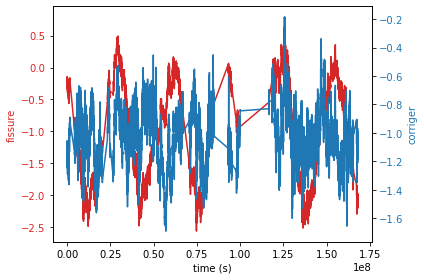

In [20]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('fissure', color=color)
ax1.plot(df['t'], df['fis'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('corriger', color=color)  # we already handled the x-label with ax1
ax2.plot(df['t'], df['fis_c'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

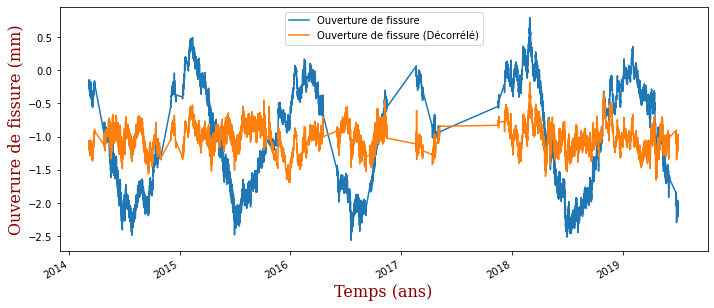

In [28]:
# plt.plot(df['Time'], df['fis'], '-', label='mesure')
# plot
plt.figure(figsize=(12, 5))
plt.plot(df['Time'], df['fis'], label='Ouverture de fissure')
# beautify the x-labels
plt.gcf().autofmt_xdate()
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.xlabel('Temps (ans)', fontdict=font)
plt.ylabel('Ouverure de fissure (mm)', fontdict=font)
plt.plot(df['Time'], df['fis_c'], '-', label='Ouverture de fissure (Décorrélé)')
# plt.plot(df['t'], df['fis_c_j'], '-', label='corriger-jour', color='tab:green')
plt.legend(loc='best')
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
# to change size of figure
plt.show()

In [22]:
# df = pd.read_csv('data/hstm.csv', delimiter=',')
# df['t'] = to_integer_and_reset(df)
# X = df[['t']].copy()
# df.astype({'t': 'int32'}).dtypes

# # to choose the variables you have
# h = True
# j = True
# s = True
# intercept = False
# if(h) :
#     # calculate the value of H
#     m = df['limni'].mean() # moyenne 
#     e = df['limni'].std() # ecart type
#     df['Zlimni'] = (df['limni'] - m) / e
#     X['H'] = df['Zlimni']
#     X['H2'] = X['H'] ** 2
#     X['H3'] = X['H'] ** 3
#     X['H4'] = X['H'] ** 4
# if(s) :
#     # calculate the value for S
#     delta_t = datetime.strptime('2011-01-01 00:00:00', '%Y-%m-%d %H:%M:%S').timestamp() - datetime.strptime('2010-01-01 00:00:00', '%Y-%m-%d %H:%M:%S').timestamp()
#     df['t_saison'] = ((df['t'] % delta_t) * math.pi * 2) / delta_t
#     X['t_saison_cos'] = df.apply(lambda row : math.cos(row['t_saison']), axis = 1)
#     X['t_saison_cos2'] = df.apply(lambda row : math.cos(2 * row['t_saison']), axis = 1)
#     X['t_saison_sin'] = df.apply(lambda row : math.sin(row['t_saison']), axis = 1)
#     X['t_saison_sin2'] = df.apply(lambda row : math.sin(2 *row['t_saison']), axis = 1)

# if (j) :
#     # calculate the value for J
#     delta_j_t = datetime.strptime('2010-01-02 00:00:00', '%Y-%m-%d %H:%M:%S').timestamp() - datetime.strptime('2010-01-01 00:00:00', '%Y-%m-%d %H:%M:%S').timestamp()
#     df['t_j'] = ((df['t'] % delta_j_t) * math.pi * 2) / delta_j_t
#     X['t_j_cos'] = df.apply(lambda row : math.cos(row['t_j']), axis = 1)
#     X['t_j_cos2'] = df.apply(lambda row : math.cos(2 * row['t_j']), axis = 1)
#     X['t_j_sin'] = df.apply(lambda row : math.sin(row['t_j']), axis = 1)
#     X['t_j_sin2'] = df.apply(lambda row : math.sin(2 *row['t_j']), axis = 1)

# # calculate HST regression 
# # X1 = df[['Zlimni','Zlimni2','Zlimni3','Zlimni4','t_saison_cos','t_saison_sin','t_saison_cos2','t_saison_sin2','t_j_cos',
# #          't_j_sin','t_j_cos2','t_j_sin2','t']]
# Y = df['fis']


# regr1 = LinearRegression()
# regr1.fit(X, Y)

# print('Intercept: \n', regr1.intercept_)
# print('Coefficients: \n', regr1.coef_)
# X['fis_c_j'] = df['fis'] - (regr1.coef_[0] * X['H'] + regr1.coef_[1] * X['H2'] + regr1.coef_[2] * X['H3'] +regr1.coef_[3] *  X['H4']+regr1.coef_[4] *  X['t_saison_cos'] +regr1.coef_[5] *  X['t_saison_sin']  + regr1.coef_[6] * X['t_saison_cos2'] + regr1.coef_[7] * X['t_saison_sin2'] + regr1.coef_[8] * X['t_j_cos']+ regr1.coef_[9] * X['t_j_sin'] + regr1.coef_[10] * X['t_j_cos2']+ regr1.coef_[11] * X['t_j_sin2'])

# X['fis_c'] = df['fis'] - (regr.coef_[0] * X['H'] + regr.coef_[1] * X['H2'] + regr.coef_[2] * X['H3'] 
#             +regr.coef_[3] *  X['H4']+regr.coef_[4] *  X['t_saison_cos'] +regr.coef_[5] *  X['t_saison_sin'] 
#                            + regr.coef_[6] * X['t_saison_cos2'] + regr.coef_[7] * X['t_saison_sin2'])

# plt.plot(df['t'], df['fis'], '-', label='mesure')
# plt.plot(X['t'], X['fis_c'], '-', label='corriger')
# plt.plot(X['t'], X['fis_c_j'], '-', label='corriger-jour')
# plt.legend(loc='best')
# plt.show()

In [23]:
# for HSTJ
from sklearn.model_selection import KFold

X1 = df[['Zlimni','Zlimni2','Zlimni3','Zlimni4','t_saison_cos','t_saison_sin','t_saison_cos2','t_saison_sin2','t_j_cos',
         't_j_sin','t_j_cos2','t_j_sin2','t']]
Y = df['fis']
kf = KFold(n_splits=5, shuffle=False)
kf.get_n_splits(X1)

MAE = []
MSE = []
RMSE = []

for train_index, test_index in kf.split(X1):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    # with sklearn
    kFoldReg = LinearRegression()
    kFoldReg.fit(X_train, y_train)
    y_pred = kFoldReg.predict(X_test)
    MAE.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Average: ')
print('MAE:', sum(MAE)/len(MAE))
print('MSE:', sum(MSE)/len(MSE))
print('RMSE:', sum(RMSE)/len(RMSE))
print('Normalized RMSE with min max methode', sum(RMSE)/len(RMSE)/ (max(df['fis']) - min(df['fis'])))
print('Normalized RMSE with mean', sum(RMSE)/len(RMSE)/ np.mean(df['fis']))
print('Normalized RMSE with the difference between 25th and 75th percentile', sum(RMSE)/len(RMSE)/ (np.quantile(df['fis'], 0.75)))
# print('Normalized RMSE with sd methode', sum(RMSE)/len(RMSE)/ np.sd(df['fis']))


TRAIN: [ 42271  42272  42273 ... 211351 211352 211353] TEST: [    0     1     2 ... 42268 42269 42270]
Mean Absolute Error: 0.16245195342794683
Mean Squared Error: 0.03943466292444593
Root Mean Squared Error: 0.1985816278623124
TRAIN: [     0      1      2 ... 211351 211352 211353] TEST: [42271 42272 42273 ... 84539 84540 84541]
Mean Absolute Error: 0.17879075111564946
Mean Squared Error: 0.046756130503733555
Root Mean Squared Error: 0.2162316593464832
TRAIN: [     0      1      2 ... 211351 211352 211353] TEST: [ 84542  84543  84544 ... 126810 126811 126812]
Mean Absolute Error: 0.20584394521957097
Mean Squared Error: 0.07243709665116607
Root Mean Squared Error: 0.26914140642265744
TRAIN: [     0      1      2 ... 211351 211352 211353] TEST: [126813 126814 126815 ... 169081 169082 169083]
Mean Absolute Error: 0.19397752741930524
Mean Squared Error: 0.0582172315085131
Root Mean Squared Error: 0.2412824724436342
TRAIN: [     0      1      2 ... 169081 169082 169083] TEST: [169084 169085

In [24]:
from sklearn.metrics import r2_score
# for only HST
X = df[['Zlimni','Zlimni2','Zlimni3','Zlimni4','t_saison_cos','t_saison_sin','t_saison_cos2','t_saison_sin2','t']]

kf = KFold(n_splits=5, shuffle=False)
kf.get_n_splits(X1)

MAE = []
MSE = []
RMSE = []
R = []
for train_index, test_index in kf.split(X1):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    # with sklearn
    kFoldReg = LinearRegression()
    kFoldReg.fit(X_train, y_train)
    y_pred = kFoldReg.predict(X_test)
    MAE.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    R.append(r2_score(y_test, y_pred))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2:',r2_score(y_test, y_pred))
print('Average: ')
print('MAE:', sum(MAE)/len(MAE))
print('MSE:', sum(MSE)/len(MSE))
print('RMSE:', sum(RMSE)/len(RMSE))
print('R2:',sum(R)/len(R))
print('Normalized RMSE with min max methode', sum(RMSE)/len(RMSE)/ (max(df['fis']) - min(df['fis'])))
print('Normalized RMSE with mean', sum(RMSE)/len(RMSE)/ np.mean(df['fis']))
print('Normalized RMSE with the difference between 25th and 75th percentile', sum(RMSE)/len(RMSE)/ (np.quantile(df['fis'], 0.75)))
# print('Normalized RMSE with sd methode', sum(RMSE)/len(RMSE)/ np.sd(df['fis']))


TRAIN: [ 42271  42272  42273 ... 211351 211352 211353] TEST: [    0     1     2 ... 42268 42269 42270]
Mean Absolute Error: 0.1658928845893706
Mean Squared Error: 0.041510006826798285
Root Mean Squared Error: 0.20374004718463742
R2: 0.8800477810255761
TRAIN: [     0      1      2 ... 211351 211352 211353] TEST: [42271 42272 42273 ... 84539 84540 84541]
Mean Absolute Error: 0.18112915349810207
Mean Squared Error: 0.04813894959883429
Root Mean Squared Error: 0.2194059014676549
R2: 0.9201239684359523
TRAIN: [     0      1      2 ... 211351 211352 211353] TEST: [ 84542  84543  84544 ... 126810 126811 126812]
Mean Absolute Error: 0.20799423530150185
Mean Squared Error: 0.07342434503234688
Root Mean Squared Error: 0.2709692695350284
R2: 0.8658764396716137
TRAIN: [     0      1      2 ... 211351 211352 211353] TEST: [126813 126814 126815 ... 169081 169082 169083]
Mean Absolute Error: 0.19587117325705952
Mean Squared Error: 0.05942962155978638
Root Mean Squared Error: 0.24378191393084594
R2: 0

In [25]:
df[['fis_c','Time', 'fis', 'limni']].to_csv(r'ibreak.csv')